# Examen 1 de análisis estadístico multivariable
## Acoyani Garrido Sandoval
## 2 de Octubre de 2025
## Parte práctica

### Para la base de datos de Andbrain_Dataset.csv

In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import json
import seaborn

andbrain_dataset = pandas.read_csv("Andbrain_DataSet.csv", index_col=0)

#### a) Calcular las medidas de tendencia central de todas las variables, y con base en la descripción de *emotions sensor data set*, dé una interpretación de los resultados obtenidos para una de las variables.

In [2]:
lista_variables = andbrain_dataset.columns.tolist()
tendencias_centrales = { una_variable: { "promedio": 0, "mediana": 0, "moda": 0 } for una_variable in lista_variables }
for una_variable in lista_variables:
    tendencias_centrales[una_variable]["promedio"] = andbrain_dataset[una_variable].mean()
    tendencias_centrales[una_variable]["mediana"] = andbrain_dataset[una_variable].median()
    tendencias_centrales[una_variable]["moda"] = andbrain_dataset[una_variable].mode()[0]

print(f"Medidas de tendencia central: {json.dumps(tendencias_centrales, indent=3)}")

Medidas de tendencia central: {
   "disgust": {
      "promedio": 0.012809019615127083,
      "mediana": 0.007936508,
      "moda": 0.035714287
   },
   "surprise": {
      "promedio": 0.03237596071539203,
      "mediana": 0.026906902500000003,
      "moda": 0.035714287
   },
   "neutral": {
      "promedio": 0.008169622408039857,
      "mediana": 0.003968254,
      "moda": 0.035714287
   },
   "anger": {
      "promedio": 0.02822395644951422,
      "mediana": 0.023809526,
      "moda": 0.035714287
   },
   "sad": {
      "promedio": 0.02724327451713379,
      "mediana": 0.023809526,
      "moda": 0.035714287
   },
   "happy": {
      "promedio": 0.03370146740879628,
      "mediana": 0.02777778,
      "moda": 0.035714287
   },
   "fear": {
      "promedio": 0.030917098897953986,
      "mediana": 0.02631579,
      "moda": 0.035714287
   }
}


Analizando estos resultados, concluímos que las emociones más prevalentes en el conjunto de datos son la sorpresa, con una probabilidad promedio de 3.23% de que cada palabra del conjunto de datos esté asociada con esa emoción; la felicidad, con una probabilidad promedio del 3.37% de que cualquier palabra tenga esa emoción; y el miedo, con una probabilidad del 3.09%. Observamos también que la felicidad podría ser una emoción asociada a algunas cuantas palabras con carga emocional particularmente intensa, pues el promedio de las probabilidades de que una palabra esté asociada con felicidad está por encima de la mediana de dichas probabilidades por 0.67 puntos porcentuales; una forma de que esto suceda, es cuando unos pocos valores muy altos sesgan el promedio hacia arriba.

#### b) ¿Para qué sirven las medidas de tendencia central?

Sirven para conocer de forma concisa los valores que uno esperaría encontrar en nuestro conjunto de datos.

#### c) Calcular las medidas de dispersión univariantes. ¿Cómo interpreta los valores obtenidos de la varianza y la desviación estándar?

In [3]:
medidas_dispersion = { una_variable: { "varianza": 0, "desvstd": 0, "rango": 0, "RI": 0 } for una_variable in lista_variables }
for una_variable in lista_variables:
    medidas_dispersion[una_variable]["varianza"] = andbrain_dataset[una_variable].var()
    medidas_dispersion[una_variable]["desvstd"] = andbrain_dataset[una_variable].std()
    medidas_dispersion[una_variable]["rango"] = andbrain_dataset[una_variable].max() - andbrain_dataset[una_variable].min()
    medidas_dispersion[una_variable]["RI"] = andbrain_dataset[una_variable].quantile(0.75) - andbrain_dataset[una_variable].quantile(0.25)

print(f"Medidas de dispersión univariantes: {json.dumps(medidas_dispersion, indent=3)}")


Medidas de dispersión univariantes: {
   "disgust": {
      "varianza": 0.0002344826399509603,
      "desvstd": 0.015312825994928576,
      "rango": 0.1394539437899,
      "RI": 0.015328675124999998
   },
   "surprise": {
      "varianza": 0.0006327000123607877,
      "desvstd": 0.02515352882521233,
      "rango": 0.1350527293441,
      "RI": 0.025604878875
   },
   "neutral": {
      "varianza": 0.00010022001651810524,
      "desvstd": 0.010010994781644092,
      "rango": 0.03568218427,
      "RI": 0.010912699500000001
   },
   "anger": {
      "varianza": 0.0005812650618448881,
      "desvstd": 0.024109439268570478,
      "rango": 0.1373594079375,
      "RI": 0.023809524
   },
   "sad": {
      "varianza": 0.00047681996699206104,
      "desvstd": 0.02183620770628593,
      "rango": 0.1249968808481,
      "RI": 0.023809524
   },
   "happy": {
      "varianza": 0.0007268640459170618,
      "desvstd": 0.02696041627863082,
      "rango": 0.1373595071677,
      "RI": 0.0275510245
   },
  

Analizando estos resultados, podemos comprobar que la felicidad, como lo consideramos en el inciso a), es la variable con mayor dispersión de datos: tiene la varianza, la desviación estándar y el rango intercuartílico más altos de todas las variables. La variable más uniforme es la ausencia de emoción asociada a una palabra, con una desviación estándar de 0.01 y un rango intercuartílico de 0.0109. Esto pudiera indicar que la posibilidad de que una palabra esté asociada con una emoción sea un hecho independiente de con qué emoción está asociada una palabra, ya que hay algunas palabras que causan más felicidad que otras, mientras que todas las palabras tienen prácticamente la misma posibilidad de no causar ninguna.

#### d) ¿Para qué sirven las medidas de dispersión?

Sirven para conocer de forma concisa qué tanta variación existe dentro de nuestro conjunto de datos. Esas medidas complementan las de tendencia central: con ambas, además de saber qué datos esperamos encontrar, sabemos también qué tanta dispersión esperamos ver en nuestros datos.

#### e) Calcular las medidas de dispersión bivariantes: matriz de covarianza, matriz de correlación, vector de medias.

In [4]:
matriz_covarianzas = andbrain_dataset.cov()
matriz_correlacion = andbrain_dataset.corr()
vector_medias = andbrain_dataset.mean()

print("Matriz de covarianzas:")
print(matriz_covarianzas)

print("\nMatriz de correlación:")
print(matriz_correlacion)

print("\nVector de medias:")
print(vector_medias)


Matriz de covarianzas:
           disgust  surprise   neutral     anger       sad     happy      fear
disgust   0.000234  0.000057  0.000085  0.000053  0.000050  0.000021  0.000056
surprise  0.000057  0.000633  0.000100 -0.000011  0.000057 -0.000044  0.000027
neutral   0.000085  0.000100  0.000100  0.000063  0.000081  0.000049  0.000076
anger     0.000053 -0.000011  0.000063  0.000581  0.000020 -0.000077 -0.000035
sad       0.000050  0.000057  0.000081  0.000020  0.000477 -0.000050  0.000038
happy     0.000021 -0.000044  0.000049 -0.000077 -0.000050  0.000727 -0.000070
fear      0.000056  0.000027  0.000076 -0.000035  0.000038 -0.000070  0.000595

Matriz de correlación:
           disgust  surprise   neutral     anger       sad     happy      fear
disgust   1.000000  0.149072  0.557045  0.142729  0.150864  0.049825  0.148948
surprise  0.149072  1.000000  0.396969 -0.017968  0.104156 -0.065244  0.043478
neutral   0.557045  0.396969  1.000000  0.259740  0.370187  0.181255  0.312440
anger

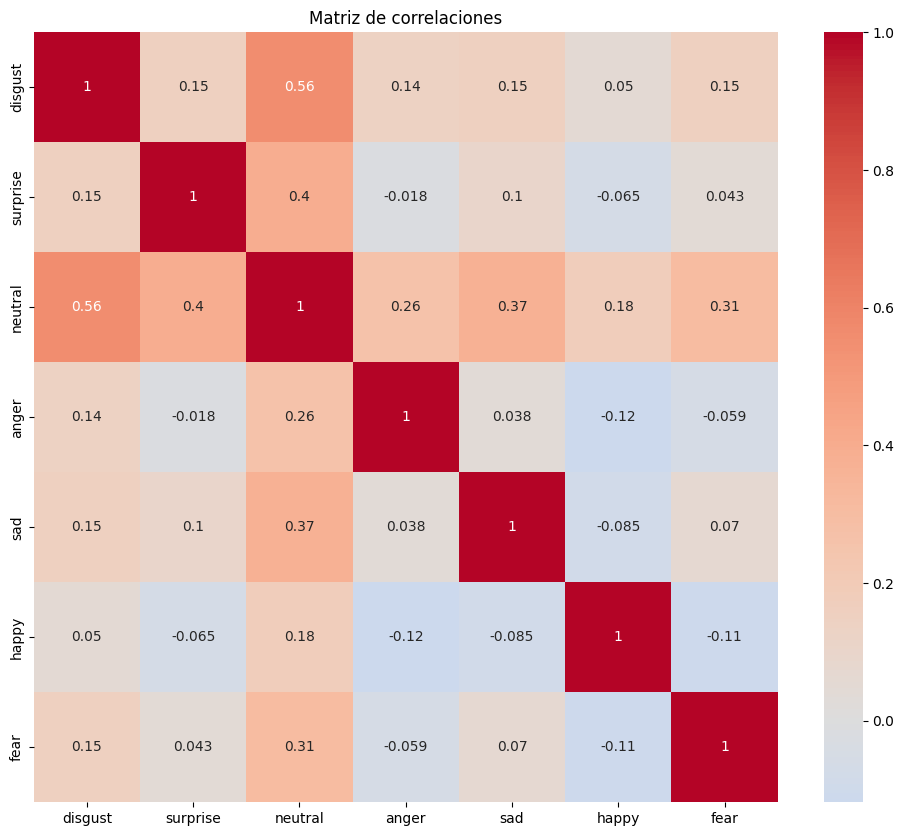

In [6]:
pyplot.figure(figsize=(12,10))
seaborn.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", center=0)
pyplot.title("Matriz de correlaciones")
pyplot.show()

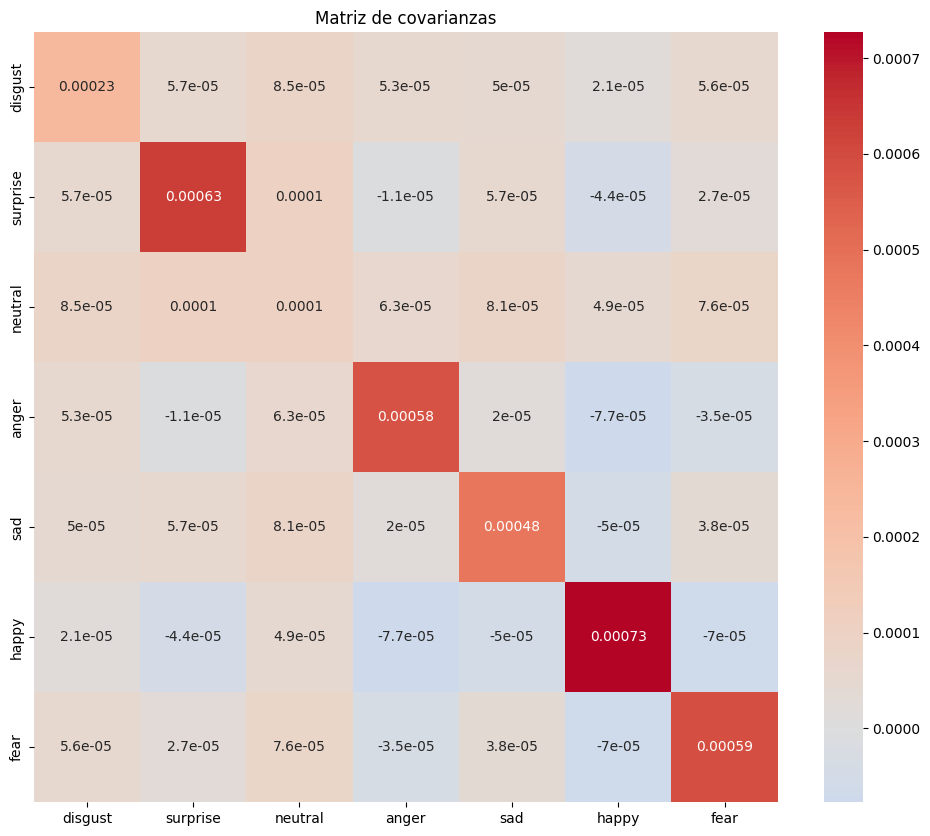

In [8]:
pyplot.figure(figsize=(12,10))
seaborn.heatmap(matriz_covarianzas, annot=True, cmap="coolwarm", center=0)
pyplot.title("Matriz de covarianzas")
pyplot.show()

#### f) ¿Qué variables presentan una relación directa, y qué variables presentan relación inversa?

neutral y disgust tienen una correlación directa con todas las demás, happy tiene una correlación inversa con todas las demás excepto neutral y disgust, sad tiene una correlación directa con todas excepto happy, anger tiene correlaciones directas e inversas a partes iguales.

#### g) ¿Qué variables tienen una relación débil?

1. happy y sad
2. happy y surprise
3. anger y surprise
4. anger y fear
5. sad y fear

#### h) ¿Qué variables tienen una relación fuerte?

1. neutral y todas las demás
2. disgust y todas excepto happy

#### i) Dé una interpretación escrita de los resultados obtenidos en la matriz de correlación.

Quizás la alta correlación entre neutral y todas las demás se deba a que el método con el que se elaboró el data set, que consistió en juntar enunciados en el internet sumando 1,185,540 palabras en total, asociar una emoción a cada uno de ellos, y calcular con ello la probabilidad de que una palabra aparezca en un enunciado con una determinada emoción, se deba a que "neutral" básicamente significa "este enunciado no causó ninguna emoción"; la alta correlación sería porque una palabra con carga emocional inherente tiene una posibilidad de que aun así no cause ninguna emoción, lo cual es contraparte de la emoción causada por la palabra.

#### j) ¿Cuál es la principal diferencia entre covarianza y correlación?

La covarianza mide qué tanto cambian juntas 2 variables en términos absolutos; la correlación, lo anterior pero en términos absolutos y normalizados.

#### k) ¿Qué valores puede tomar la covarianza, y qué valores puede tomar la correlación?

La covarianza se mide en las unidades del conjunto de datos, por lo que puede ir de $-\infty$ a $\infty$; la correlación, en cambio, está estandarizada y va de -1 a 1.

#### l) Si 2 variables tienen correlación cero, ¿se puede concluir que son independientes? Justifique por qué.

A priori, no, porque la correlación no implica causa; lo que sí podemos concluir es que podrían ser independientes, ya que al indicar una correlación igual a 0 una ausencia de relación lineal entre las variables, tenemos una pista para investigar si no hay ninguna relación entre ambas y con ello concluir a posteriori sobre su independencia.